https://www.kaggle.com/code/ryanholbrook/creating-features

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)




/tmp/ipykernel_33/2668033471.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
accidents = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")

In [3]:
autos = pd.read_csv("/kaggle/input/automobile-dataset/Automobile_data.csv")

In [17]:
customer = pd.read_csv("/kaggle/input/ibm-watson-marketing-customer-value-data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")


The concrete file cannot be read with read_csv, as it gives an encoding error.  Thus the need to install the excel reading kit (xlrd)

In [8]:
!pip install xlrd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.3 MB/s eta 0:00:00a 0:00:01


In [12]:

concrete = pd.read_excel("/kaggle/input/concrete-comprehensive-strength/Concrete_Data.xls")

In [ ]:
autos.columns.tolist()

In [ ]:
autos[["stroke", "bore"]].head()

In [ ]:
print(autos.dtypes)

Get the indices where there is an unknown value, which cannot be used in the calculations.

In [ ]:
unknown_strokes = autos.index[autos['stroke'] == "?"].tolist()

In [ ]:
unknown_bores = autos.index[autos['bore'] == "?"].tolist()

In [ ]:
invalid_auto_data = list(set(unknown_bores + unknown_strokes))
print(invalid_auto_data)

In [ ]:
autos = autos.drop(invalid_auto_data)
autos["stroke"] = autos["stroke"].astype(float)
autos["bore"] = autos["bore"].astype(float)

In [ ]:
autos["stroke_ratio"] = autos.stroke / autos.bore

print(autos.dtypes)

In [ ]:
autos[["stroke", "bore", "stroke_ratio", "num-of-cylinders"]].head()

hah, the cylinders column is strings names of numbers...
https://stackoverflow.com/questions/493174/is-there-a-way-to-convert-number-words-to-integers

In [ ]:
!pip install word2number

In [ ]:
from word2number import w2n

print(w2n.word_to_num(autos["num-of-cylinders"][0]))

In [ ]:
autos["num-of-cylinders"] = autos.apply(lambda x: w2n.word_to_num(x["num-of-cylinders"]), axis=1)

In [ ]:
autos["num-of-cylinders"].head()

In [ ]:
# This does not work, see above...
# autos["num-of-cylinders"] = w2n.word_to_num(autos["num-of-cylinders"])

In [ ]:
autos["displacement"] = (
    np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos["num-of-cylinders"]
)

In [ ]:
autos["displacement"].head()

In [ ]:
print(accidents.dtypes)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


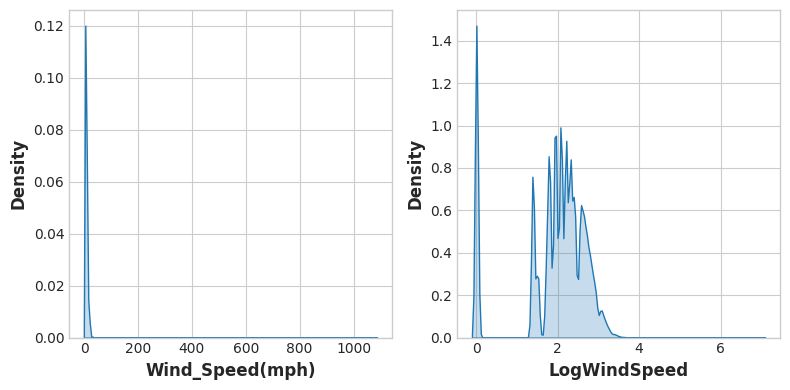

In [16]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents["LogWindSpeed"] = accidents["Wind_Speed(mph)"].apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents["Wind_Speed(mph)"], fill=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, fill=True, ax=axs[1]);

In [ ]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

accidents[roadway_features + ["RoadwayFeatures"]].head(10)

In [13]:
print(concrete.dtypes)

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object


Borrow some code from a previous tutorial to rename the columns in a more useful fashion

In [14]:
new_column_names = concrete.columns.values.tolist()
tutorial_column_names = ["Cement","BlastFurnaceSlag","FlyAsh","Water",
                         "Superplasticizer","CoarseAggregate","FineAggregate",
                         "Age","CompressiveStrength"]
columns_dict = dict(zip(new_column_names, tutorial_column_names))

concrete.rename(columns=columns_dict, inplace=True)

concrete.keys()

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

In [15]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


In [18]:
customer[["Type", "Level"]] = (  # Create two new features
    customer["Policy"]           # from the Policy feature
    .str                         # through the string accessor
    .split(" ", expand=True)     # by splitting on " "
                                 # and expanding the result into separate columns
)

customer[["Policy", "Type", "Level"]].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [21]:
autos["make_and_style"] = autos["make"] + "_" + autos["body-style"]
autos[["make", "body-style", "make_and_style"]].head()

,make,body-style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


In [22]:
customer["AverageIncome"] = (
    customer.groupby("State")  # for each state
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)

customer[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [23]:
customer["StateFreq"] = (
    customer.groupby("State")
    ["State"]
    .transform("count")
    / customer.State.count()
)

customer[["State", "StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


In [25]:
print(customer.dtypes)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Type            

In [26]:
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["Total Claim Amount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Basic,384.701622
1,Extended,485.748584
2,Basic,384.701622
3,Basic,384.701622
4,Premium,665.182378
5,Extended,485.748584
6,Basic,384.701622
7,Basic,384.701622
8,Premium,665.182378
9,Basic,384.701622
